In [1]:
import Pkg; Pkg.activate("../"); Pkg.instantiate()

  Activating project at `~/Kaleb_Data/PhD_Research/mEclares`
Precompiling project...
  ? Convex


In [7]:
using LinearAlgebra
using BlockDiagonals
using ForwardDiff
using ControlSystems
using ComponentArrays
using Parameters: @unpack
using StaticArrays
using Plots

In [8]:
# include dependencies
include("../src/utils.jl")
include("../src/ExpDynamicsLibrary.jl")
include("../src/RefTrajectoryLibrary.jl")
include("../src/ExpControllerLibrary.jl")
include("../src/Visualization.jl")
include("../src/RefTrajectoryLibrary.jl")

About to load the trajectories


==== Trajectories loaded for Demo 2 ==== 
About to load the trajectories


==== Trajectories loaded for Demo 2 ==== 
About to load the trajectories


==== Trajectories loaded for Demo 2 ==== 


Main.RefTrajLib

In [9]:
include("../src/ExpmeSchFlylab_2.jl")

About to load the trajectories


==== Trajectories loaded for Demo 2 ==== 
About to load the trajectories
==== Trajectories loaded for Demo 2 ==== 


Main.meSchExpDIFL

In [19]:
## Testing meSch

# Initial state
soc_init = 50.0
N = 1.0
int_pos_1 = [0.0; 0.0; 0.0]
int_pos_2 = [-2.5; 0.0; 0.0]
# [(0.0, 0.0)], [(-2.5, 0.0)]]

# Get the quad_parameters
quad_p = ExpDyn.quadrotor_parameters

## Define the quad's initial condition
quad1_ic = ComponentArray(
    x = int_pos_1,
    v = zeros(3),
    R = 1.0(I(3)) |> collect, 
    Ω = zeros(3),
    ω = 2*ExpDyn.hover_ω(quad_p),
    soc = soc_init
);

quad2_ic = ComponentArray(
    x = int_pos_2,
    v = zeros(3),
    R = 1.0(I(3)) |> collect, 
    Ω = zeros(3),
    ω = 2*ExpDyn.hover_ω(quad_p),
    soc = soc_init
);

discharge_rate = 0.6667
T_SIM = 100.0

quad_ic = ComponentArray(
    quad1 = quad1_ic,
    quad2 = quad2_ic
)

# params = meSchExpDI.simulate(quad_states, 0., T_SIM, discharge_rate)
sol_nc, params = meSchExpDIFL.simulate(quad_ic, 0., T_SIM, discharge_rate)
X1 = sol_nc.u;
# T = sol_nc.t;
# println("size of state vecs: $(size(sol_nc.u))")
# println("size of state vecs: $(size(sol_nc.t))")

=========== In recompute_committed ==============
Current time: 0.0
integrator.p[i].charge_start_time: 0.0
charge_time_dur: 3.0
integrator.p[i].landed : 0
integrator.u[quad_keys[i]].soc : 50.0
current_soc: 50.0
integrator.p[i].charge_start_time: 0.0
charge_time_dur: 3.0
integrator.p[i].landed : 0
integrator.u[quad_keys[i]].soc : 50.0
current_soc: 50.0
Remaining flight time 1st quad: 74.99625018749063
Remaining flight time: 74.99625018749063
TC: 11.900000000000002
TF - TC > k(T_c + T_delta): 63.096250187490625 > 21.0
Expected gap: 42.096250187490625
Gap satisfied: true
current time: 0.0
GAP FLAG: false
=========== Out recompute_committed ==============
=========== In recompute_committed ==============
Current time: 1.0
integrator.p[i].charge_start_time: 0.0
charge_time_dur: 3.0
integrator.p[i].landed : 0
integrator.u[quad_keys[i]].soc : 49.3333
current_soc: 49.3333
integrator.p[i].charge_start_time: 0.0
charge_time_dur: 3.0
integrator.p[i].landed : 0
integrator.u[quad_keys[i]].soc : 49.

In [20]:
params[1].nom_traj.xs;

In [28]:
sol_nc.u[1].quad1.x

3-element view(::Vector{Float64}, 1:3) with eltype Float64:
 0.0
 0.0
 0.0

## Plot the distance between the two quads

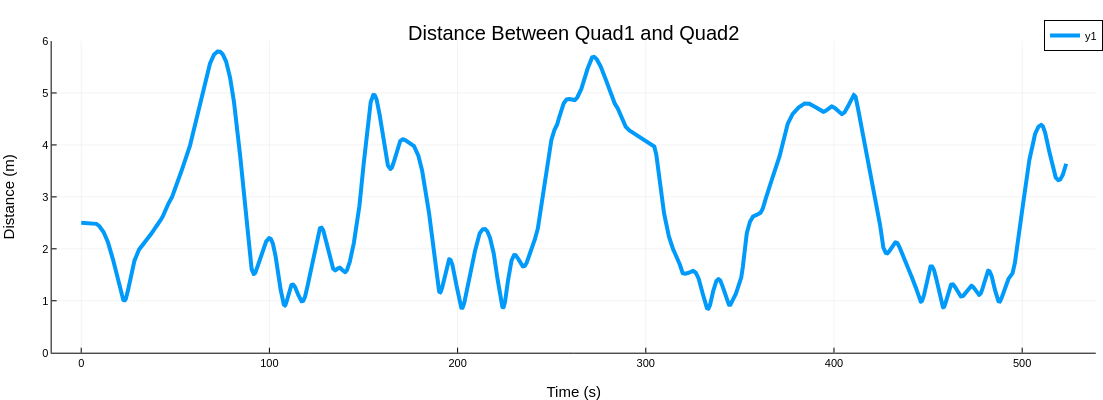

In [34]:
# Compute distance between quad1 and quad2 at each time step
dists = [norm(s.quad1.x - s.quad2.x) for s in sol_nc.u]

# Generate time vector
Δt = 0.05  # Adjust to your actual timestep
t = collect(0:Δt:(length(sol_nc.u) - 1) * Δt)

# Plot
plotly()
plot(t, dists, xlabel="Time (s)", ylabel="Distance (m)", title="Distance Between Quad1 and Quad2", lw=4, ylims=(0, 6))

In [22]:
include("../src/RefTrajectoryLibrary.jl")

About to load the trajectories


==== Trajectories loaded for Demo 2 ==== 


Main.RefTrajLib

In [23]:
#Set up visualization
using TrajOptPlots
using MeshCat
using StaticArrays
using RobotZoo:Quadrotor

vis = Visualizer()
render(vis)

┌ Info: MeshCat server started. You can open the visualizer by visiting the following URL in your browser:
└ http://127.0.0.1:8702


MeshCat.DisplayedVisualizer(MeshCat.CoreVisualizer(MeshCat.SceneTrees.SceneNode(nothing, nothing, Dict{String, Vector{UInt8}}(), nothing, Dict{String, MeshCat.SceneTrees.SceneNode}()), Set{Any}(), ip"127.0.0.1", 8702))

In [24]:
# [Trajectories] Create and Visualize the reference trajectories
include("../src/RefTrajectoryLibrary.jl")
include("../src/Visualization.jl")
# For Quad 1
t0 = 0.
N = 1200
traj_type = 1
dt = 0.05

# Draw first trajectory
Xref_1, Uref1 = RefTrajLib.DI_3D_get_desired_ergodic_trajectory(t0, traj_type, N, dt, 1); # The last argument is for the param type
Xref_2, Uref2 = RefTrajLib.DI_3D_get_desired_ergodic_trajectory(t0, traj_type, N, dt, 2); # The last argument is for the param type
Visualization.vis_traj!(vis, 1, :traj_1, Xref_1[1:1100]; R = 0.01, color = MeshCat.RGBA(1.0, 0.0, 0.0, 2.5))
Visualization.vis_traj!(vis, 1, :traj_2, Xref_2[1:1100]; R = 0.01, color = MeshCat.RGBA(1.0, 1.0, 0.0, 2.5))

About to load the trajectories


==== Trajectories loaded for Demo 2 ==== 


In [25]:
# [Quadrotors] Visualize the Quadrotors
Visualization.N_animate_system_geometric!(vis, X1, 2, 0.01)

In [26]:
# setobject!(vis, HyperRectangle(Vec(0., 0, 0), Vec(1., 1, 1)), MeshCat.MeshPhongMaterial(color = MeshCat.RGBA(0.0,1.0,0.0,0.2)))
# settransform!(vis, MeshCat.Translation(-0.5, -0.5, 0))
# # setprop!(vis, "material.opacity", 0.5)  # Correct usage of setprop!

### Draw Bounds

In [27]:
X_bound = [[-3.60, -4.80, 1.0],
            [0.0, -4.80, 1.0],
            [2.40, -4.80, 1.0],
            [2.40, 0.0, 1.0],
            [2.40, 1.80, 1.0],
            [0.0, 1.80, 1.0],
            [-3.60, 1.80, 1.0],
            [-3.40, -1.40, 1.0]]

# Generate 100 values for z from 0 to 2.0
z_values = range(0, stop=8.0, length=400)

# Generate the 500-element vector (each with 100 points)
points = [[x, y, z] for (x, y, _) in X_bound for z in z_values];

Visualization.vis_traj!(vis, 2, :lab_bound, points; R = 0.01, color = MeshCat.RGBA(0.0, 1.0, 0.0, 2.5))